# PROJECT DATA VISUALIZATION
The objectif of this project is to present the number of medical laboratories in metropolitan France per department.


In [ ]:
#First import the libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd as xl
import pygal
import geopandas as gpd

In [ ]:
df=pd.read_csv(r'/Users/teahupoo20/Documents/GitHub/data-ft-par-labs/Projects/Week-4/sites-prelevements-grand-public.csv')

In [3]:
df

,ID,id_ej,finess,rs,adresse,cpl_loc,do_prel,do_antigenic,longitude,latitude,mod_prel,public,horaire,horaire_prio,check_rdv,tel_rdv,web_rdv,date_modif
0,HlI2rCJ014Dk4X3Z,010001725,010001733,LBM CROIX BLANCHE BOURG EN B,51 AV AMEDEE MERCIER 01000 BOURG EN BRESSE,NaN,OUI,NON,5.241852,46.203851,Sur place,Tout public,lundi : 8h00-12h00 et 14h00-19h00 | mardi : 8h...,NaN,Sur rendez-vous uniquement,0474452636,NaN,2020-10-29
1,N6k2IZRxWgysYAUD,010009843,010009850,LBM BIOPTEAM BOURG EN B LALANDE,14 R DE LA GRENOUILLERE 01000 BOURG EN BRESSE,NaN,OUI,NON,5.226313,46.208489,Sur place,Tout public,NaN,NaN,NaN,0474226107,NaN,2020-10-29
2,aXgKkWXOZyDwwQog,010009843,010009868,LBM BIOPTEAM BOURG EN B BRETIN,8 PL JOUBERT 01000 BOURG EN BRESSE,NaN,OUI,NON,5.222134,46.203186,Sur place,Tout public,lundi : 10h00-12h00 mardi : 10h00-12h00 merc...,NaN,NaN,0474225209,NaN,2020-10-29
3,dIv6XOa41yZUSmf8,010009843,010009876,LBM BIOPTEAM VONNAS,48 PL FERDINAND DE BEOST 01540 VONNAS,NaN,OUI,NON,4.991750,46.218786,Sur place,Tout public,lundi : 8h30-16h30 mardi : 8h30-16h30 mercre...,NaN,NaN,0474500517,NaN,2020-10-29
4,B1J9ffrWHd9E2SSQ,020000063,020000162,CH SAINT-QUENTIN,1 R MICHEL DE L'HOSPITAL 02321 ST QUENTIN CEDEX,NaN,OUI,NON,3.269153,49.861845,Sur place,Tout public,NaN,NaN,NaN,NaN,NaN,2020-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,1k9jG6ATYcN5n5zd,ARS-IDF,AUTRE,MSP Auvers sur Oise,3 Rue Roger Tagliana 95430 Auvers-sur-Oise,NaN,OUI,NON,2.162688,49.068057,Sur place,Tout public,lundi : 14h00-16h00 | mardi : 14h00-16h00 | me...,NaN,Sur rendez-vous uniquement,01.76.54.19.57,NaN,2020-10-29
3337,dPQARjv8TdWPJtLh,ARS-IDF,AUTRE,CDS,1 Rue Charles Drot 92500 Rueil-Malmaison,Hôpital Stell,OUI,NON,2.187152,48.876616,Sur place,Tout public,lundi : 8h30-19h00 | mardi : 8h30-19h00 | merc...,NaN,NaN,NaN,NaN,2020-10-29
3338,Pzuwjr6IxRiA69Is,ARS-IDF,920010477,CMS de Malakoff,74 Rue Jules Guesde 92240 Malakoff,NaN,OUI,NON,2.286552,48.813760,Sur place,Tout public,lundi : 8h30-19h00 | mardi : 8h30-19h00 | merc...,NaN,NaN,NaN,NaN,2020-10-29
3339,VmA4hUq34Xh2OZUt,ARS-IDF,AUTRE,Centre Covid Levallois,1 Place de Verdun 92300 Levallois-Perret,Pavillon des Fêtes,OUI,NON,2.285527,48.894125,Sur place,Tout public,lundi : 9h00-17h00 | mardi : 9h00-17h00 | merc...,NaN,NaN,NaN,NaN,2020-10-29


In [4]:
# We select only the data from metropolitan France, so we select the latitude > 40 from the dataframe
df.query('latitude>40')

,ID,id_ej,finess,rs,adresse,cpl_loc,do_prel,do_antigenic,longitude,latitude,mod_prel,public,horaire,horaire_prio,check_rdv,tel_rdv,web_rdv,date_modif
0,HlI2rCJ014Dk4X3Z,010001725,010001733,LBM CROIX BLANCHE BOURG EN B,51 AV AMEDEE MERCIER 01000 BOURG EN BRESSE,NaN,OUI,NON,5.241852,46.203851,Sur place,Tout public,lundi : 8h00-12h00 et 14h00-19h00 | mardi : 8h...,NaN,Sur rendez-vous uniquement,0474452636,NaN,2020-10-29
1,N6k2IZRxWgysYAUD,010009843,010009850,LBM BIOPTEAM BOURG EN B LALANDE,14 R DE LA GRENOUILLERE 01000 BOURG EN BRESSE,NaN,OUI,NON,5.226313,46.208489,Sur place,Tout public,NaN,NaN,NaN,0474226107,NaN,2020-10-29
2,aXgKkWXOZyDwwQog,010009843,010009868,LBM BIOPTEAM BOURG EN B BRETIN,8 PL JOUBERT 01000 BOURG EN BRESSE,NaN,OUI,NON,5.222134,46.203186,Sur place,Tout public,lundi : 10h00-12h00 mardi : 10h00-12h00 merc...,NaN,NaN,0474225209,NaN,2020-10-29
3,dIv6XOa41yZUSmf8,010009843,010009876,LBM BIOPTEAM VONNAS,48 PL FERDINAND DE BEOST 01540 VONNAS,NaN,OUI,NON,4.991750,46.218786,Sur place,Tout public,lundi : 8h30-16h30 mardi : 8h30-16h30 mercre...,NaN,NaN,0474500517,NaN,2020-10-29
4,B1J9ffrWHd9E2SSQ,020000063,020000162,CH SAINT-QUENTIN,1 R MICHEL DE L'HOSPITAL 02321 ST QUENTIN CEDEX,NaN,OUI,NON,3.269153,49.861845,Sur place,Tout public,NaN,NaN,NaN,NaN,NaN,2020-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,1k9jG6ATYcN5n5zd,ARS-IDF,AUTRE,MSP Auvers sur Oise,3 Rue Roger Tagliana 95430 Auvers-sur-Oise,NaN,OUI,NON,2.162688,49.068057,Sur place,Tout public,lundi : 14h00-16h00 | mardi : 14h00-16h00 | me...,NaN,Sur rendez-vous uniquement,01.76.54.19.57,NaN,2020-10-29
3337,dPQARjv8TdWPJtLh,ARS-IDF,AUTRE,CDS,1 Rue Charles Drot 92500 Rueil-Malmaison,Hôpital Stell,OUI,NON,2.187152,48.876616,Sur place,Tout public,lundi : 8h30-19h00 | mardi : 8h30-19h00 | merc...,NaN,NaN,NaN,NaN,2020-10-29
3338,Pzuwjr6IxRiA69Is,ARS-IDF,920010477,CMS de Malakoff,74 Rue Jules Guesde 92240 Malakoff,NaN,OUI,NON,2.286552,48.813760,Sur place,Tout public,lundi : 8h30-19h00 | mardi : 8h30-19h00 | merc...,NaN,NaN,NaN,NaN,2020-10-29
3339,VmA4hUq34Xh2OZUt,ARS-IDF,AUTRE,Centre Covid Levallois,1 Place de Verdun 92300 Levallois-Perret,Pavillon des Fêtes,OUI,NON,2.285527,48.894125,Sur place,Tout public,lundi : 9h00-17h00 | mardi : 9h00-17h00 | merc...,NaN,NaN,NaN,NaN,2020-10-29


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

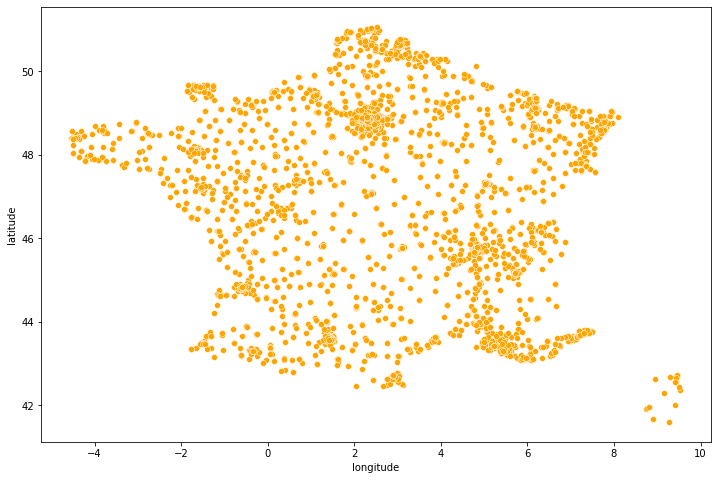

In [5]:
#This is the visualization of the dataframe
plt.figure(figsize=(12,8))
sns.scatterplot(data = df.query('latitude>40'), x= 'longitude', y='latitude', color='orange')


In [ ]:
b_chart = pygal.Bar()
b_chart.title = "Destiny Kill/Death Ratio"

In [ ]:
#install additional modules for GPD
!pip install GDAL
!pip install Fiona
!pip install geopandas
!pip install proj
!pip install Shapely
!pip install Cartopy
!pip install rasterio
!pip install contextily

In [ ]:
!pip install GDAL --user

In [6]:
#Now we use GPD to visualize the french departments map from departements.geojson
regions = gpd.read_file('/Users/teahupoo20/Desktop/livi/departements.geojson')

In [7]:
regions

,code,nom,geometry
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ..."
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ..."
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240..."
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ..."
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
...,...,...,...
91,41,Loir-et-Cher,"POLYGON ((0.84122 48.10306, 0.87588 48.10943, ..."
92,53,Mayenne,"POLYGON ((-0.86036 48.50146, -0.84611 48.49828..."
93,54,Meurthe-et-Moselle,"MULTIPOLYGON (((5.45556 49.48093, 5.44953 49.4..."
94,79,Deux-Sèvres,"POLYGON ((-0.89196 46.97582, -0.87973 46.97580..."


In [ ]:
regions.nom.value_counts()

<AxesSubplot:>

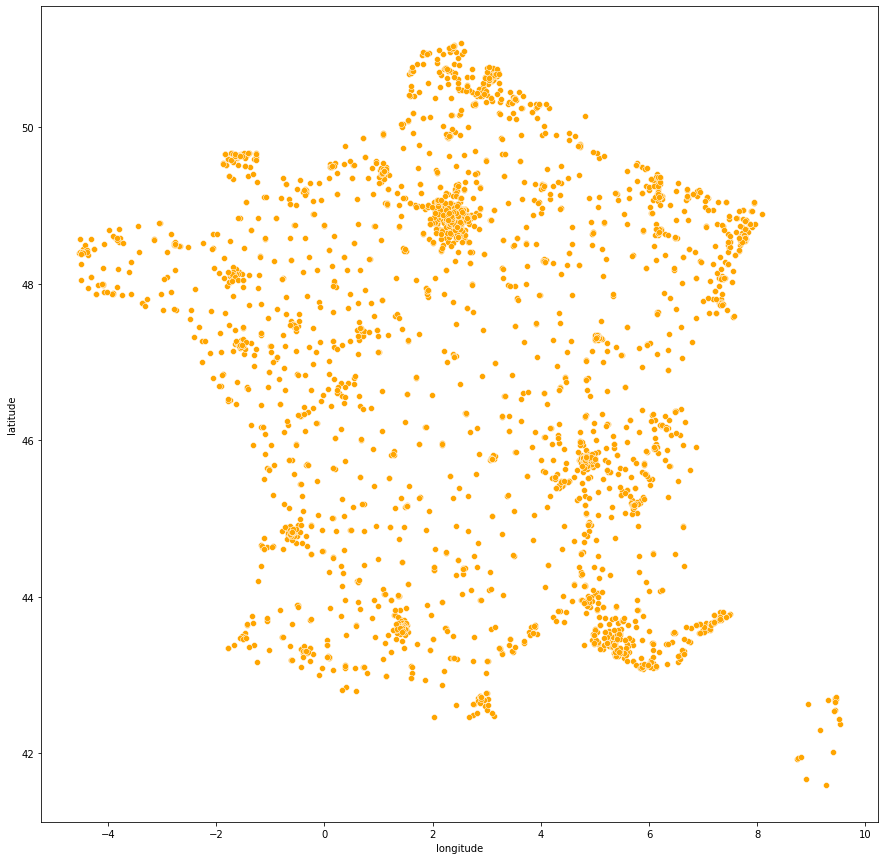

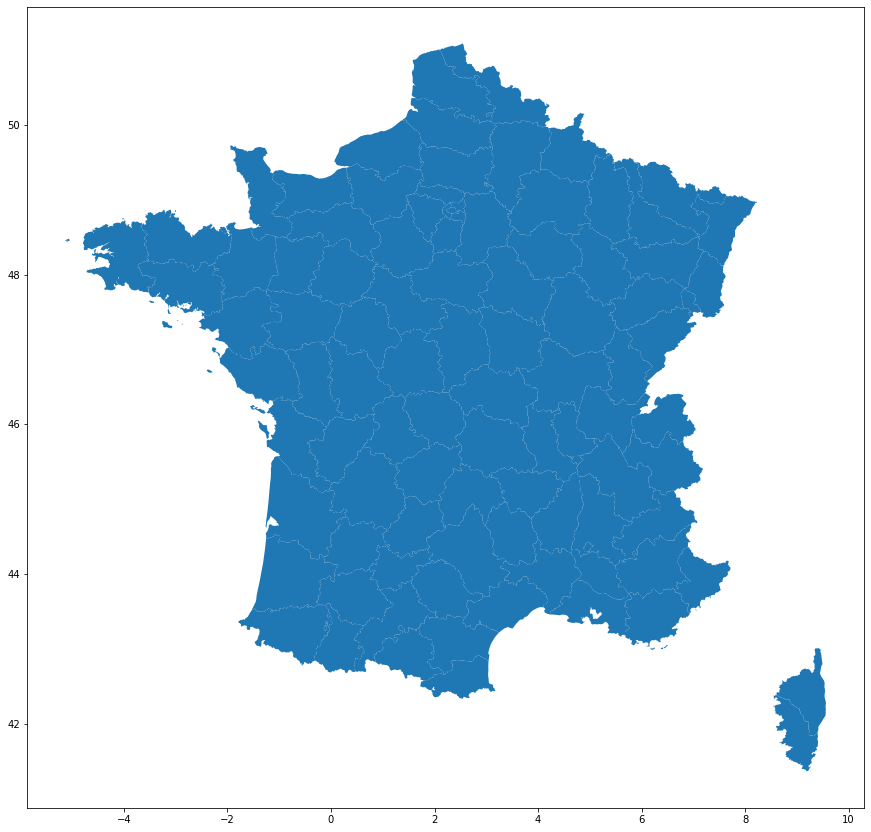

In [8]:

plt.figure(figsize=(15,15))
sns.scatterplot(data = df.query('latitude>40'), x= 'longitude', y='latitude', color='orange')
regions.plot(figsize=(15,15))

In [9]:
#Import additional libraries
import requests as r
import time 

In [322]:
#Now we get from API wrapper the name of department
r.get('https://api-adresse.data.gouv.fr/reverse/?lon=2.37&lat=48.357').json()['features'][0]['properties']['context'].split(', ')

['91', 'Essonne', 'Île-de-France']

In [ ]:
r.get('https://api-adresse.data.gouv.fr/reverse/?lon=2.37&lat=48.357').json()['features'][0]['properties']['context'].split(', ')[-2]

In [10]:
def get_dep(x):
    time.sleep(0.25)
    try:
        return  r.get(f'https://api-adresse.data.gouv.fr/reverse/?lon={x.longitude}&lat={x.latitude}').json()['features'][0]['properties']['context'].split(', ')[-2]
        
    except:
        return ''
        

In [11]:
df.loc[0:1].apply(get_dep, axis=1)

0    Ain
1    Ain
dtype: object

In [12]:
df.loc[0:, 'new_departments']=df.loc[0:].apply(get_dep, axis=1)

In [ ]:
df.new_column.head(10)

In [14]:
df.loc[3000:3100]

,ID,id_ej,finess,rs,adresse,cpl_loc,do_prel,do_antigenic,longitude,latitude,mod_prel,public,horaire,horaire_prio,check_rdv,tel_rdv,web_rdv,date_modif,new_departments
3000,VSwukrblMBcLbLrL,920026564,920026622,LBM BIOGROUPBPO-BIOEPINE SITE COLOMBES,456 Rue Gabriel Péri 92700 Colombes,NaN,OUI,NON,2.230415,48.915037,Sur place/A domicile/En EHPAD/En étab. santé,Tout public,Lundi au vendredi 09h 10h SANS RDV,NaN,Sans rendez-vous,+33 1 76 21 57 76,NaN,2020-11-21,Hauts-de-Seine
3001,taDM9dgc2zpzJ30n,920026564,920026648,LBM BIOGROUP BPO-BIOEPINE SITE GARCHES,5 Rue de l'Abreuvoir 92380 Garches,NaN,OUI,NON,2.185720,48.843250,Sur place/A domicile/En EHPAD/En étab. santé,Tout public,Du lundi au vendredi 07h à 13H SANS RDV,NaN,Sans rendez-vous,+33 1 47 95 31 90,NaN,2020-11-21,Hauts-de-Seine
3002,Pl90WW346Mg3LeNA,920026564,920026655,LBM BIOGROUP BPO-BIOEPINE SITE GARENNE,96 Boulevard de la République 92250 La Garenne...,NaN,OUI,NON,2.241373,48.907362,Sur place/A domicile/En EHPAD/En étab. santé,Tout public,Du lundi au vendredi SUR RDV DE 8H a 13H,Du lundi au vendredi SUR RDV DE 8H a 13H,Sur rendez-vous uniquement,+33 1 46 49 83 90,NaN,2020-11-21,Hauts-de-Seine
3003,UeWBfMplhfEiTmRc,920026564,920026663,LBM BIOGROUP BPO-BIOEPINE SITE LEVALLOIS LECLERC,2 Place du General Leclerc 92300 Levallois-Perret,NaN,OUI,NON,2.285380,48.892095,Sur place/A domicile/En EHPAD/En étab. santé,Tout public,sans RDV du lundi au vendredi de 7h30 à 11h,sans RDV du lundi au vendredi de 11h30 à 13h,Sans rendez-vous,+33 1 47 57 85 86,NaN,2020-11-21,Hauts-de-Seine
3004,CkqehLUOtNX3tjHw,920026564,920026739,LBM BIOGROUP BPO-BIOEPINE SITE PUTEAUX MAIRIE,129 Rue de la République 92800 Puteaux,NaN,OUI,NON,2.239621,48.884622,Sur place/A domicile/En EHPAD/En étab. santé,Tout public,lundi au vendredi sans rdv de 7h30 à 13h | et...,.,Sans rendez-vous,+33 1 47 76 33 53,NaN,2020-11-21,Hauts-de-Seine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,LtKsVcrc0J9Ibbsc,920150059,920000650,Centre Médical Raymond Burgos,12 Rue Carnot 92150 Suresnes,Local dédié,OUI,NON,2.225318,48.871671,Sur place,Tout public,samedi : 8h00-12h00 1 semaine sur 2 | dimanche...,NaN,NaN,01 85 90 79 13,NaN,2020-10-29,Hauts-de-Seine
3097,FXSGN55ZhC61prDL,920150059,920000650,HOPITAL FOCH,40 R WORTH 92151 SURESNES CEDEX,Laboratoire des prélèvements,OUI,NON,2.221255,48.871210,Sur place,Tout public,Sur semaine (lundi au vendredi) de 8:00 à 17:00 |,NaN,NaN,01 46 25 25 25,rendezvous@hopital-foch.org,2020-10-29,Hauts-de-Seine
3098,cSbo4OfTUOsJxRzu,930019591,930010020,CDS DE LA POLYCLINIQUE D AUBERVILLIERS,55 R HENRI BARBUSSE 93300 AUBERVILLIERS,de 13h à 14h,OUI,NON,2.389393,48.905289,Sur place,Tout public,NaN,NaN,oui,0148394182,NaN,2020-10-29,Seine-Saint-Denis
3099,ZwrW7Yf3yYkjZ4pz,930023296,750048621,LBM LABORATOIRE CLEMENT SITE PARIS,17 AV D'EYLAU 75016 PARIS,NaN,OUI,NON,2.284754,48.864393,Sur place,Tout public,NaN,NaN,Sur rendez-vous uniquement,0156903333,pcrcovid19@laboclement.com,2020-10-29,Paris


In [15]:
df.new_departments.value_counts()

Bouches-du-Rhône         183
Paris                    124
Rhône                    108
Nord                     105
Bas-Rhin                  94
                        ... 
Corse-du-Sud               5
Cantal                     5
Lozère                     4
973                        2
Territoire de Belfort      1
Name: new_departments, Length: 101, dtype: int64

In [16]:
df.new_departments.nunique()

101

In [ ]:
df.groupby('new_column')

In [92]:
df2=df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3341 non-null   object 
 1   id_ej            3341 non-null   object 
 2   finess           3341 non-null   object 
 3   rs               3336 non-null   object 
 4   adresse          3315 non-null   object 
 5   cpl_loc          1556 non-null   object 
 6   do_prel          3341 non-null   object 
 7   do_antigenic     3341 non-null   object 
 8   longitude        3334 non-null   float64
 9   latitude         3334 non-null   float64
 10  mod_prel         3341 non-null   object 
 11  public           3341 non-null   object 
 12  horaire          2431 non-null   object 
 13  horaire_prio     380 non-null    object 
 14  check_rdv        2932 non-null   object 
 15  tel_rdv          2886 non-null   object 
 16  web_rdv          1342 non-null   object 
 17  date_modif    

In [93]:
pd.crosstab(index=df2.new_departments, columns=df2.ID, values=(df2.new_departments,df2.ID), aggfunc='count', margins=True)
df2

ValueError: Length of values (2) does not match length of index (3341)

In [72]:
df2=df.groupby('new_departments').agg({'ID':'count'}).set_index()

TypeError: set_index() missing 1 required positional argument: 'keys'

In [58]:
df2

,ID
new_departments,
,15
971,13
972,7
973,2
974,31
...,...
Vendée,26
Vienne,23
Vosges,17


In [20]:
df2.groupby('new_departments').sum()

new_departments
            15
971         13
972          7
973          2
974         31
            ..
Vendée      26
Vienne      23
Vosges      17
Yonne       15
Yvelines    67
Name: ID, Length: 101, dtype: int64

In [71]:
df2.columns

Index(['ID'], dtype='object')

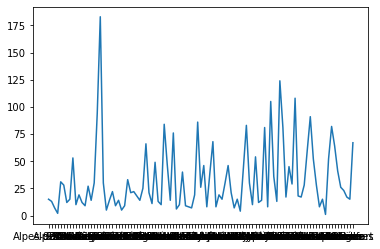

In [60]:
plt.plot(df2)

In [29]:
df2.describe()

count    101.000000
mean      33.079208
std       31.317625
min        1.000000
25%       12.000000
50%       21.000000
75%       46.000000
max      183.000000
Name: ID, dtype: float64

In [42]:
df2.columns

AttributeError: 'Series' object has no attribute 'columns'

In [59]:
df2.sum()

ID    3341
dtype: int64

In [63]:
regions

,code,nom,geometry
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ..."
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ..."
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240..."
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ..."
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
...,...,...,...
91,41,Loir-et-Cher,"POLYGON ((0.84122 48.10306, 0.87588 48.10943, ..."
92,53,Mayenne,"POLYGON ((-0.86036 48.50146, -0.84611 48.49828..."
93,54,Meurthe-et-Moselle,"MULTIPOLYGON (((5.45556 49.48093, 5.44953 49.4..."
94,79,Deux-Sèvres,"POLYGON ((-0.89196 46.97582, -0.87973 46.97580..."


In [61]:
dfmerge= regions.merge(df2, left_on='nom', right_on='new_departments')


In [94]:
dfmerge

,code,nom,geometry,ID
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...",12
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",27
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",30
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...",5
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",11
...,...,...,...,...
91,41,Loir-et-Cher,"POLYGON ((0.84122 48.10306, 0.87588 48.10943, ...",15
92,53,Mayenne,"POLYGON ((-0.86036 48.50146, -0.84611 48.49828...",10
93,54,Meurthe-et-Moselle,"MULTIPOLYGON (((5.45556 49.48093, 5.44953 49.4...",54
94,79,Deux-Sèvres,"POLYGON ((-0.89196 46.97582, -0.87973 46.97580...",22


In [95]:
df2

,ID,id_ej,finess,rs,adresse,cpl_loc,do_prel,do_antigenic,longitude,latitude,mod_prel,public,horaire,horaire_prio,check_rdv,tel_rdv,web_rdv,date_modif,new_departments
0,HlI2rCJ014Dk4X3Z,010001725,010001733,LBM CROIX BLANCHE BOURG EN B,51 AV AMEDEE MERCIER 01000 BOURG EN BRESSE,NaN,OUI,NON,5.241852,46.203851,Sur place,Tout public,lundi : 8h00-12h00 et 14h00-19h00 | mardi : 8h...,NaN,Sur rendez-vous uniquement,0474452636,NaN,2020-10-29,Ain
1,N6k2IZRxWgysYAUD,010009843,010009850,LBM BIOPTEAM BOURG EN B LALANDE,14 R DE LA GRENOUILLERE 01000 BOURG EN BRESSE,NaN,OUI,NON,5.226313,46.208489,Sur place,Tout public,NaN,NaN,NaN,0474226107,NaN,2020-10-29,Ain
2,aXgKkWXOZyDwwQog,010009843,010009868,LBM BIOPTEAM BOURG EN B BRETIN,8 PL JOUBERT 01000 BOURG EN BRESSE,NaN,OUI,NON,5.222134,46.203186,Sur place,Tout public,lundi : 10h00-12h00 mardi : 10h00-12h00 merc...,NaN,NaN,0474225209,NaN,2020-10-29,Ain
3,dIv6XOa41yZUSmf8,010009843,010009876,LBM BIOPTEAM VONNAS,48 PL FERDINAND DE BEOST 01540 VONNAS,NaN,OUI,NON,4.991750,46.218786,Sur place,Tout public,lundi : 8h30-16h30 mardi : 8h30-16h30 mercre...,NaN,NaN,0474500517,NaN,2020-10-29,Ain
4,B1J9ffrWHd9E2SSQ,020000063,020000162,CH SAINT-QUENTIN,1 R MICHEL DE L'HOSPITAL 02321 ST QUENTIN CEDEX,NaN,OUI,NON,3.269153,49.861845,Sur place,Tout public,NaN,NaN,NaN,NaN,NaN,2020-10-29,Aisne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,1k9jG6ATYcN5n5zd,ARS-IDF,AUTRE,MSP Auvers sur Oise,3 Rue Roger Tagliana 95430 Auvers-sur-Oise,NaN,OUI,NON,2.162688,49.068057,Sur place,Tout public,lundi : 14h00-16h00 | mardi : 14h00-16h00 | me...,NaN,Sur rendez-vous uniquement,01.76.54.19.57,NaN,2020-10-29,Val-d'Oise
3337,dPQARjv8TdWPJtLh,ARS-IDF,AUTRE,CDS,1 Rue Charles Drot 92500 Rueil-Malmaison,Hôpital Stell,OUI,NON,2.187152,48.876616,Sur place,Tout public,lundi : 8h30-19h00 | mardi : 8h30-19h00 | merc...,NaN,NaN,NaN,NaN,2020-10-29,Hauts-de-Seine
3338,Pzuwjr6IxRiA69Is,ARS-IDF,920010477,CMS de Malakoff,74 Rue Jules Guesde 92240 Malakoff,NaN,OUI,NON,2.286552,48.813760,Sur place,Tout public,lundi : 8h30-19h00 | mardi : 8h30-19h00 | merc...,NaN,NaN,NaN,NaN,2020-10-29,Hauts-de-Seine
3339,VmA4hUq34Xh2OZUt,ARS-IDF,AUTRE,Centre Covid Levallois,1 Place de Verdun 92300 Levallois-Perret,Pavillon des Fêtes,OUI,NON,2.285527,48.894125,Sur place,Tout public,lundi : 9h00-17h00 | mardi : 9h00-17h00 | merc...,NaN,NaN,NaN,NaN,2020-10-29,Hauts-de-Seine


In [115]:
df3=df2.new_departments.value_counts().reset_index()

In [136]:
df3.head()

,nom,new_departments
0,Bouches-du-Rhône,183
1,Paris,124
2,Rhône,108
3,Nord,105
4,Bas-Rhin,94


In [118]:
df3.rename(columns={'index':'nom'}, inplace = True)

In [145]:
df3.loc[df3.nom=='Bouches-du-Rhône']

,nom,new_departments
0,Bouches-du-Rhône,183


In [120]:
merged=regions.merge(df3, left_on='nom',right_on='nom')

In [121]:
merged

,code,nom,geometry,new_departments
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...",12
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",27
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",30
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...",5
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",11
...,...,...,...,...
91,41,Loir-et-Cher,"POLYGON ((0.84122 48.10306, 0.87588 48.10943, ...",15
92,53,Mayenne,"POLYGON ((-0.86036 48.50146, -0.84611 48.49828...",10
93,54,Meurthe-et-Moselle,"MULTIPOLYGON (((5.45556 49.48093, 5.44953 49.4...",54
94,79,Deux-Sèvres,"POLYGON ((-0.89196 46.97582, -0.87973 46.97580...",22


In [127]:
df2.loc[df2['new_departments']=='Mayenne'].count()

ID                 10
id_ej              10
finess             10
rs                 10
adresse            10
cpl_loc             4
do_prel            10
do_antigenic       10
longitude          10
latitude           10
mod_prel           10
public             10
horaire             6
horaire_prio        0
check_rdv           9
tel_rdv             8
web_rdv             0
date_modif         10
new_departments    10
dtype: int64

<AxesSubplot:xlabel='new_departments', ylabel='Count'>

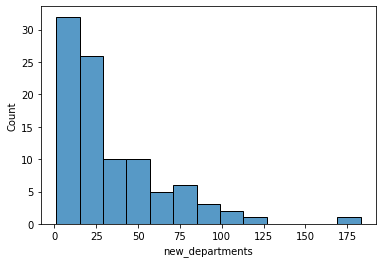

In [129]:
sns.histplot(merged['new_departments'])

In [133]:
merged.describe()

,new_departments
count,96.000000
mean,34.093750
std,31.722507
min,1.000000
25%,12.750000
50%,21.500000
75%,46.250000
max,183.000000


<ipython-input-314-bc9d8757b9fe>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  merged.apply(lambda x: fig.annotate(s=x.code, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


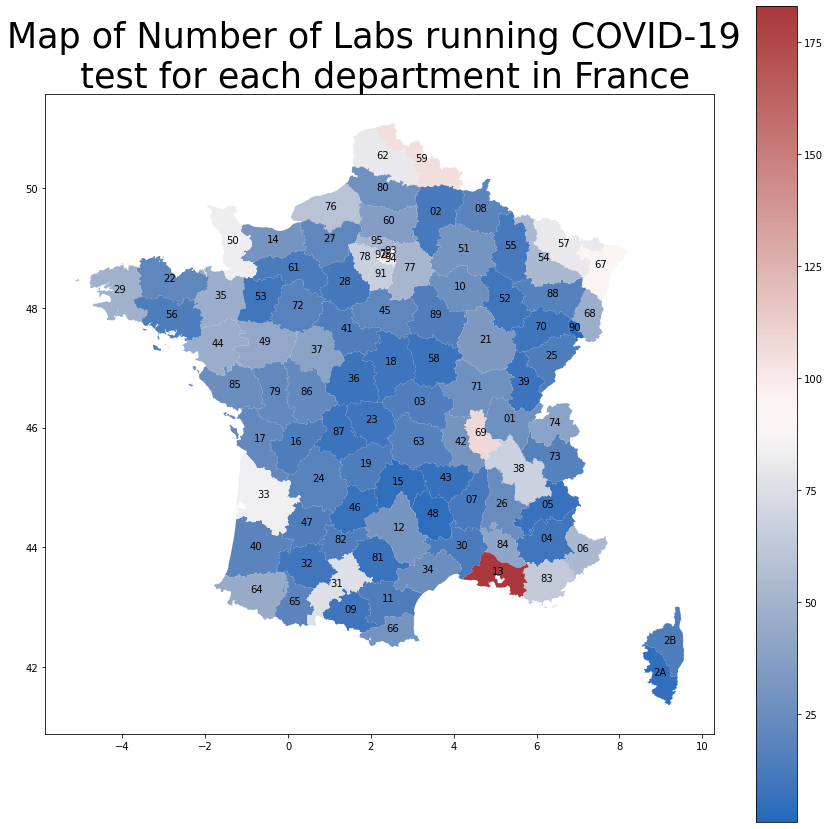

In [314]:
fig=merged.plot(figsize=(15,15),column='new_departments', legend=True, label='nom', cmap='vlag')
plt.title('Map of Number of Labs running COVID-19 \n test for each department in France', fontsize=35)
merged.apply(lambda x: fig.annotate(s=x.code, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
plt.savefig('carte.png')
plt.show()


In [135]:
merged.to_csv('merged.csv',index=False)

In [146]:
merged

,code,nom,geometry,new_departments
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...",12
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",27
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",30
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...",5
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",11
...,...,...,...,...
91,41,Loir-et-Cher,"POLYGON ((0.84122 48.10306, 0.87588 48.10943, ...",15
92,53,Mayenne,"POLYGON ((-0.86036 48.50146, -0.84611 48.49828...",10
93,54,Meurthe-et-Moselle,"MULTIPOLYGON (((5.45556 49.48093, 5.44953 49.4...",54
94,79,Deux-Sèvres,"POLYGON ((-0.89196 46.97582, -0.87973 46.97580...",22


In [ ]:
merged

In [259]:
%config InlineBackend.figure_format='png'

In [260]:
fig.plt.savefig('merged.png')

AttributeError: 'Figure' object has no attribute 'plt'

In [266]:
plt.savefig('merged1.jpg')


<Figure size 432x288 with 0 Axes>

In [265]:
fig

<AxesSubplot:title={'center':'Map of Number of Labs running COVID-19 \n test for each department in France'}>

In [171]:
df4=df.new_departments.value_counts().describe()
df4

count    101.000000
mean      33.079208
std       31.317625
min        1.000000
25%       12.000000
50%       21.000000
75%       46.000000
max      183.000000
Name: new_departments, dtype: float64

/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'Line2D' object has no property 'kind'

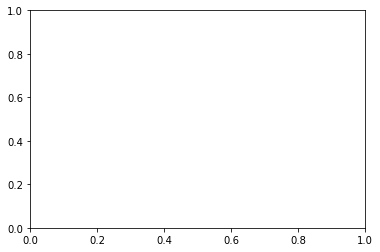

In [180]:
sns.boxenplot(merged['new_departments'], kind='boxen')

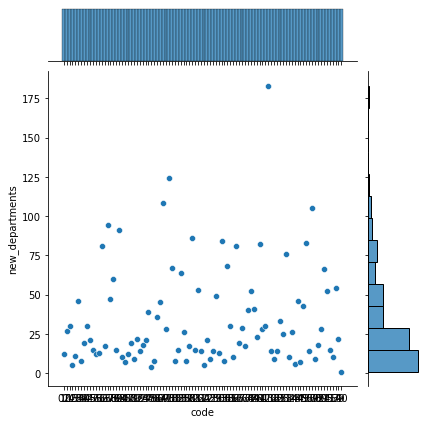

In [182]:
sns.jointplot(data=merged, x='code', y='new_departments')

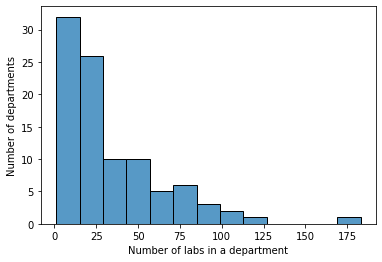

In [276]:
ax=sns.histplot(merged['new_departments'])
ax.set(xlabel='Number of labs in a department', ylabel='Number of departments')
plt.savefig('img1.jpg')

<AxesSubplot:xlabel='nom', ylabel='new_departments'>

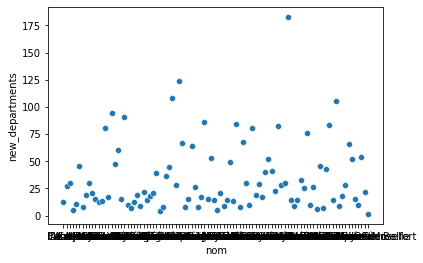

In [187]:
sns.scatterplot(data=merged, x='nom', y='new_departments')

In [285]:
merged[merged.new_departments == merged.new_departments.max()]

,code,nom,geometry,new_departments
70,13,Bouches-du-Rhône,"POLYGON ((4.73906 43.92406, 4.82173 43.91283, ...",183


In [290]:
mergedclean=merged[['nom','new_departments']]

In [295]:
mergedclean=mergedclean.sort_values(by='new_departments', ascending=False)[:10]
mergedclean

,nom,new_departments
70,Bouches-du-Rhône,183
36,Paris,124
34,Rhône,108
85,Nord,105
15,Bas-Rhin,94
19,Seine-Saint-Denis,91
44,Hauts-de-Seine,86
54,Gironde,84
83,Manche,83
67,Val-de-Marne,82


<Figure size 432x288 with 0 Axes>

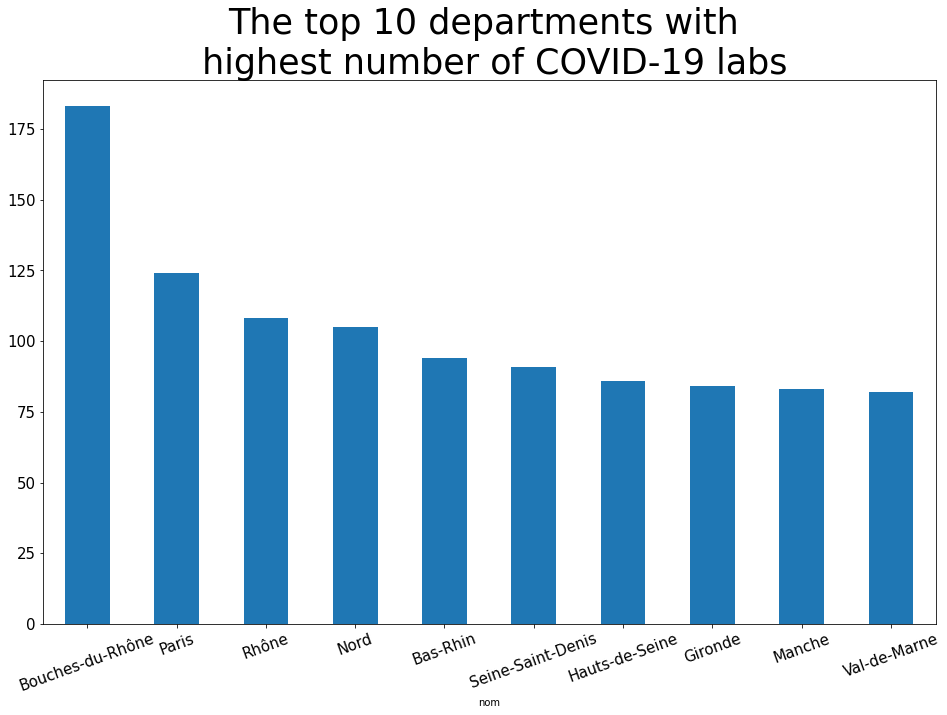

In [320]:
fig=plt.figure()
mergedclean.plot.bar(x='nom',y='new_departments', legend=False,figsize=(16,10),fontsize=15)
plt.xticks(rotation=20)
plt.title('The top 10 departments with \n highest number of COVID-19 labs', fontsize=35)
plt.savefig('merged2.jpg')
plt.show()

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

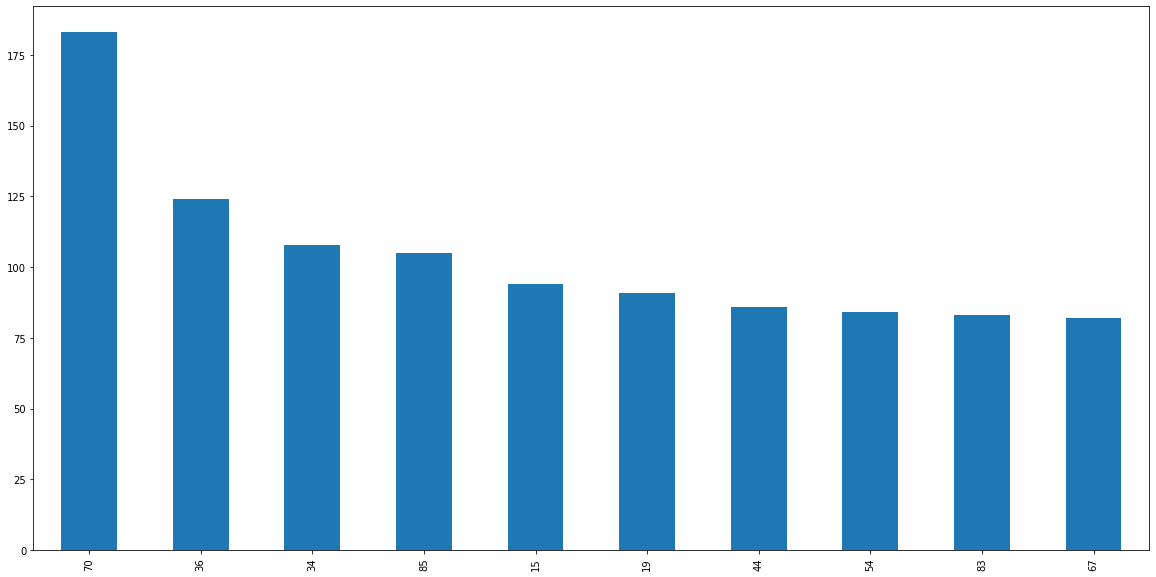

In [287]:
fig=plt.figure()
plt.figure(figsize=(20,10))
merged.new_departments.sort_values(ascending=False)[:10].plot.bar(x='nom')


In [279]:
fig=plt.figure()
merged.plot.barh(x='nom', y='test', figsize=(20, 15))
fontsize=12,
label='nom'
plt.title('Number of Labs running COVID-19 test for given department', fontsize=25)




AttributeError: 'function' object has no attribute 'barh'

<Figure size 432x288 with 0 Axes>

In [224]:
plt.savefig('merged2.jpg')

<Figure size 432x288 with 0 Axes>

In [255]:
merged

,code,nom,geometry,new_departments
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...",12
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",27
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",30
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...",5
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",11
...,...,...,...,...
91,41,Loir-et-Cher,"POLYGON ((0.84122 48.10306, 0.87588 48.10943, ...",15
92,53,Mayenne,"POLYGON ((-0.86036 48.50146, -0.84611 48.49828...",10
93,54,Meurthe-et-Moselle,"MULTIPOLYGON (((5.45556 49.48093, 5.44953 49.4...",54
94,79,Deux-Sèvres,"POLYGON ((-0.89196 46.97582, -0.87973 46.97580...",22
